# Plotting Radial Intensity Profile of A Concentric Circle Pattern


ywan (December 2019)

In [93]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import RegularGridInterpolator as RPI

## Generate Image

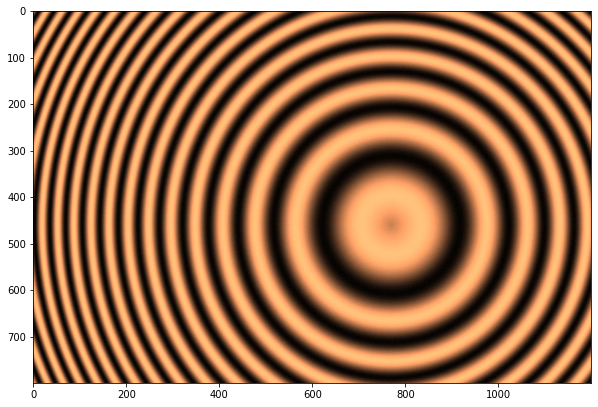

In [119]:
xArray = np.arange(1200) # Pixel Height

yArray = np.arange(800) # Pixel Width

ImX,ImY = np.meshgrid(xArray,yArray,sparse = False, indexing = 'xy')

ImageCtr = (770,459) # X,Y Pixels of the center.
 


RArray = np.sqrt((ImX-ImageCtr[0])**2 + (ImY-ImageCtr[1])**2)

Image = np.sin(0.3*(RArray/50+1)**2) + 0.1 * np.random.random(RArray.shape) # With Noise


plt.figure(figsize=(10,10))
plt.imshow(Image, origin = 'upper',cmap = 'copper') # Start Counting From Top Left, Computer Default

## Establish Interpolator

In [127]:
ImageInterp = RPI((yArray,xArray), Image, fill_value = 0, bounds_error = False)

## Interpolate and Plot

If what you are looking is out of bounds, a value of zero will be returned.

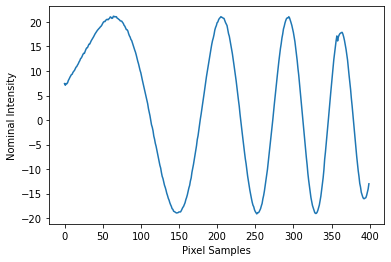

In [129]:
N = 20 # Number of Radial Cuts
M = 400 # Number of Data Points

Stepsize = 1 # Pixels 

TestArrayTotal = np.zeros(M)
TestArray = np.zeros(M)

for i in range(N):
    
    angle = 2*np.pi/N*i
    
    UnitX = np.cos(angle)
    UnitY = np.sin(angle)
    
    PointsT = np.arange(M)
    PointsX  = PointsT*UnitX*Stepsize + ImageCtr[0]
    PointsY = PointsT*UnitY*Stepsize + ImageCtr[1]
    
    for j in range(M):
        TestArray[j] = ImageInterp([PointsY[j],PointsX[j]])
    

    TestArrayTotal += TestArray
    
plt.xlabel('Pixel Samples')
plt.ylabel('Nominal Intensity')
plt.plot(TestArrayTotal)